# Introduction
For this project I decided to analyse the Seatle Airbnb dataset found on Kaggle: https://www.kaggle.com/code/zacksshen/kaggle-seattle-airbnb using the CRISP-DM Process of:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results

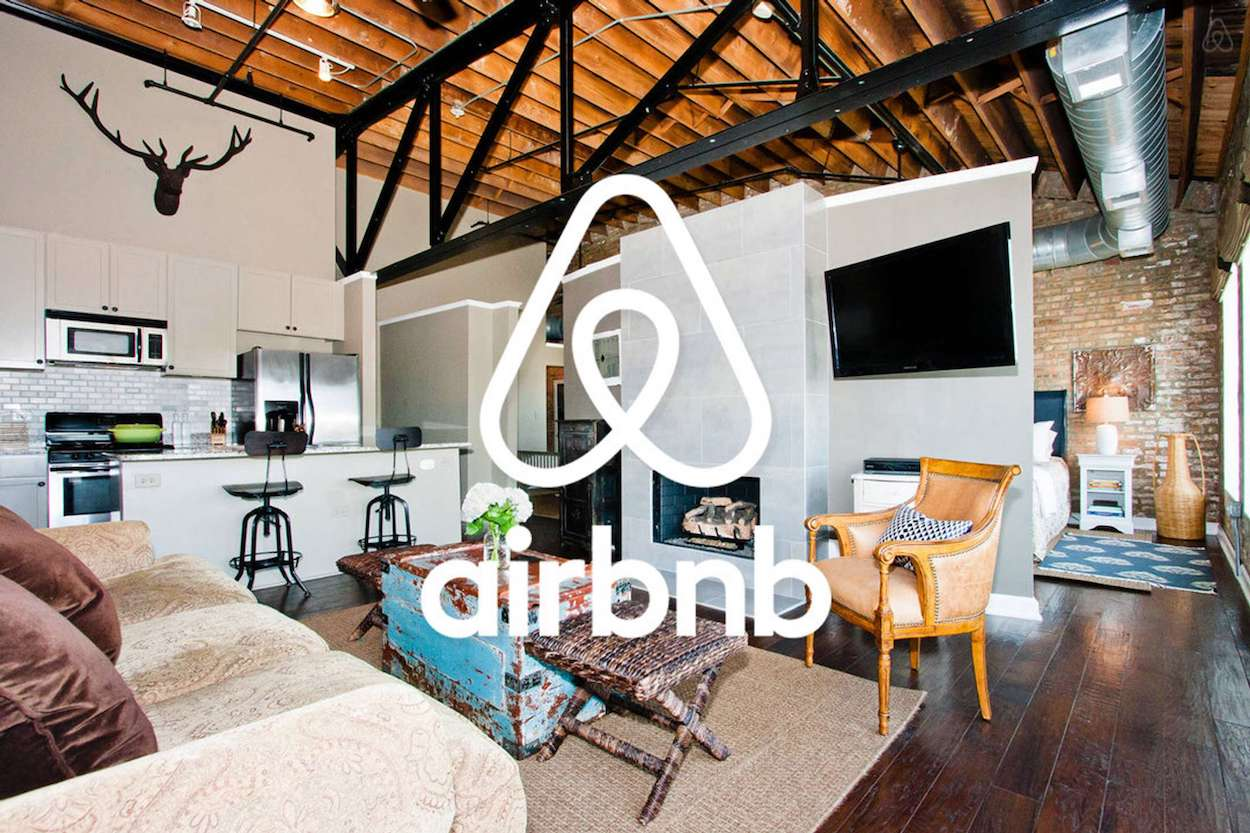

# Business Understanding

Airbnb is one of the best resources for people who are interested in tourism and would like to live in some places have its own style and not like hotels' general services, airbnb could make people feel at home and serve themselves. Many people who have not only one houses/apartment will rent it out or make it an airbnb, the price is based on the market price with some fluacuation based on neighbourhood and apartment type and scraped style. In this analysis, I would like to dive deep into Seattle Airbnb to understand the market of Aribnb there and analyze which factors influence price the most and what's the busiest season for people visiting Seattle.
Based on the data available for Seatlle Airbnb, I'm interetsted in below questions
1. Which area has most listings and which area airbnb averge price is the highest
2. What are the busiest times of the year to visit Seattle
3. What's the most popular property type and room type and how that influence the price.
4. How to leverage Machine Learning to predict Price of an Airbnb, what's the most important features.

To answer these questions we will use data from the calendar, reviews and listings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
plt.style.use('seaborn-white')

In [3]:
'''Set up plot style '''
from matplotlib import cycler 
colors = cycler('color',
                           ['#EE6666', '#3388BB', '#9988DD',
                            '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [4]:
#Read in data file
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

# Data Understanding

There are three sets of data: 
1. calendar: calendar.csv stores data of airbnb unique id and whether it's available with a price 
2. reviews: reviewers comments on each house
3. listings: stores data with airbnb link and details of the house

## calendar.csv

In [5]:
# Calendar.csv stores data of airbnb unique id and whether it's available with a price
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [7]:
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [8]:
calendar.listing_id.nunique()

3818

In [9]:
calendar.date.max()

'2017-01-02'

In [10]:
calendar.date.min()

'2016-01-04'

Text(0.5, 1.0, 'Price Distribution')

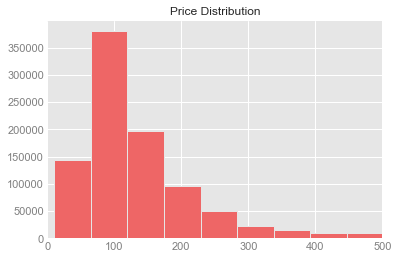

In [62]:
# Check price distribution from calendar.csv
# From the plot below we can see most of the airbnb price falls between $100 - $200
calendar.price.hist(bins = 30)
plt.xlim(0,500)
plt.title('Price Distribution')

In [64]:
calendar.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


### listings.csv

In [65]:
#listings.csv stores data with airbnb link and details of the house
pd.set_option('display.max_columns', 500)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [67]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [66]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<AxesSubplot:>

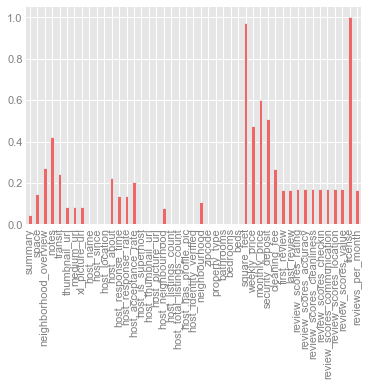

In [77]:
# Check columns which have missing values and show the percentage of missing values of these columns
listing_missing_value = listings.isnull().mean()
listing_missing_columns = listing_missing_value[listing_missing_value>0]
listing_missing_columns.plot.bar()

In [68]:
listings.host_id.nunique()

2751

In [69]:
listings.id.nunique()

3818

In [23]:
listings.shape

(3818, 92)

In [15]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### reviews.csv

In [11]:
#reviewers comments on each house
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [20]:
reviews.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

# Prepare Data

To prepare data used to answer the business questions we have on Seattle Airbnb, we need to solve below data problems:
1. __clean data format__, such as 'price' which is stored as 'object', for analysis purpose we need to transform it to float
2. __extract date__, date is stored on a daily basis in the calendar.csv and listings.csv, for analysis purposes, it would be useful to extract year and month from the date columns
3. __missing values__, work on features which have missing values and are useful to check its influence on airbnb prices, three methods are used here: drop missing values; fill missing values with mean value of the column; fill missing value with mode value of the column
4. __feature engineering__: some features may not be useful on themselves but will be useful while combined with others to create new features, such as number of bathrooms per accomdates will give more information than bathrooms itself.
5. __drop useless columns__: some columns don't provide any useful infomration on our business questions, such as url, we will drop these columns.

## calendar

In [11]:
# Clean the "price" column, remove special charaters and show price in float format
calendar["price"] = calendar['price'].str.replace('$','')
calendar["price"] = calendar['price'].str.replace(',','')
calendar['price'] = calendar['price'].astype('float')
calendar.head()

/var/folders/db/0dwf3kds6j10nl3vmlwx57tc0000gn/T/ipykernel_3536/701779732.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar["price"] = calendar['price'].str.replace('$','')


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
# Extract year and month from the "date" column
calendar['year']=pd.Series(pd.to_datetime(calendar.date).dt.year)
calendar['month']=pd.Series(pd.to_datetime(calendar.date).dt.month)

## listings

In [13]:
listings_cleaned = listings.copy() 
'''Extract year/month/month day from the date column
listings['year']=int(listings['date'].str.split('-')[0])
listings['month']=int(listings['date'].str.split('-')[1])
listings['month_day']=int(listings['date'].str.split('-')[2])  '''

"Extract year/month/month day from the date column\nlistings['year']=int(listings['date'].str.split('-')[0])\nlistings['month']=int(listings['date'].str.split('-')[1])\nlistings['month_day']=int(listings['date'].str.split('-')[2])  "

In [14]:
# Clean "price" field and make it as float type, and generate "price_percentile" column based on price
listings_cleaned.dropna(subset=['price'], inplace = True)
listings_cleaned["price"] = listings_cleaned['price'].str.replace('$','')
listings_cleaned["price"] = listings_cleaned['price'].str.replace(',','')
listings_cleaned['price'] = listings_cleaned['price'].astype('float')
listings_cleaned['price_percentile'] = pd.qcut(listings_cleaned['price'], 5, 
                                       labels= ['0.2','0.4','0.6','0.8','1.0'],duplicates = 'drop')

/var/folders/db/0dwf3kds6j10nl3vmlwx57tc0000gn/T/ipykernel_3536/1604532212.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_cleaned["price"] = listings_cleaned['price'].str.replace('$','')


In [15]:
# clean rate field, remove special charater and make rate columns as float type
listings_cleaned['host_response_rate'] = listings_cleaned['host_response_rate'].str.replace('%','').astype('float')
listings_cleaned['host_acceptance_rate'] = listings_cleaned['host_acceptance_rate'].str.replace('%','').astype('float')

In [18]:
# Missing Value Resolution

# For below columns, since mode stands for the most frequent type, so using mode of the column fill missing value
listings_cleaned['bathrooms'].fillna(listings_cleaned['bathrooms'].mode()[0],inplace = True)
listings_cleaned['bedrooms'].fillna(listings_cleaned['bedrooms'].mode()[0],inplace = True)
listings_cleaned['beds'].fillna(listings_cleaned['beds'].mode()[0],inplace = True)
listings_cleaned['property_type'].fillna(listings_cleaned['property_type'].mode()[0],inplace = True)
listings_cleaned['host_total_listings_count'].fillna(listings_cleaned['host_total_listings_count'].mode()[0], inplace = True)

# For below columns, these are rate type columns, fill missing values with mean of the rate 
listings_cleaned['review_scores_rating'].fillna(listings_cleaned['review_scores_rating'].mean(), inplace = True)
listings_cleaned['host_response_rate_cleaned'] = listings_cleaned['host_response_rate'].fillna(listings_cleaned['host_response_rate'].mean())
listings_cleaned['host_acceptance_rate_cleaned']=listings_cleaned['host_acceptance_rate'].fillna(listings_cleaned['host_acceptance_rate'].mean())

In [19]:
# generate a few new features based on bathrooms and number of accomadates
# number of bathrooms and beds per accomodates could give more information on space customers could use per person

listings_cleaned['bathroom_per_accommodates'] = listings_cleaned['bathrooms']/listings_cleaned['accommodates']
listings_cleaned['beds_per_accommodates'] = listings_cleaned['beds']/listings_cleaned['accommodates']

In [20]:
# Drop useless columns, we wont focus on text mining in this case, so remove all the text related columns
# url columns won't have useful information
# neighbourhood columns are duplicated, will just keep the one without missing value
# host name and host related information is not necessary to predict price of airbnb here
# availability of the listings could be used for busist season analysis but can also be replaced by total listings per period

columns_to_drop = ['listing_url', 'name','scrape_id', 'summary','neighbourhood_group_cleansed','last_scraped',
   'space', 'description', 'experiences_offered','neighborhood_overview','host_neighbourhood','neighbourhood',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','require_guest_profile_picture','require_guest_phone_verification',
   'xl_picture_url','host_url', 'host_name','host_about', 'host_response_time','host_thumbnail_url', 'host_picture_url',
       'host_listings_count','host_verifications','street', 'city', 'state','market','smart_location', 'country_code', 'country', 
   'is_location_exact','amenities', 'square_feet','weekly_price', 'monthly_price','extra_people', 'minimum_nights',
   'maximum_nights', 'calendar_updated', 'has_availability','security_deposit', 'cleaning_fee','host_is_superhost',
   'availability_30', 'availability_60', 'availability_90','last_review','host_since','zipcode',
   'availability_365', 'calendar_last_scraped','first_review','review_scores_accuracy', 'review_scores_cleanliness',
   'review_scores_checkin', 'review_scores_communication','host_location','host_has_profile_pic','host_identity_verified',
   'review_scores_location', 'review_scores_value','license', 'jurisdiction_names', 'instant_bookable',
        'calculated_host_listings_count','reviews_per_month','host_response_rate','host_acceptance_rate','requires_license']
listings_cleaned.drop(columns_to_drop,axis = 1, inplace = True)

In [21]:
listings_cleaned.head()

,id,host_id,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,guests_included,number_of_reviews,review_scores_rating,cancellation_policy,price_percentile,host_response_rate_cleaned,host_acceptance_rate_cleaned,bathroom_per_accommodates,beds_per_accommodates
0,241032,956883,3.0,West Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,...,85.0,2,207,95.000000,moderate,0.4,96.000000,100.000000,0.250000,0.250000
1,953595,5177328,6.0,West Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,...,150.0,1,43,96.000000,strict,0.8,98.000000,100.000000,0.250000,0.250000
2,3308979,16708587,2.0,West Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,...,975.0,10,20,97.000000,strict,1.0,67.000000,100.000000,0.409091,0.636364
3,7421966,9851441,1.0,West Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,...,100.0,1,0,94.539262,flexible,0.6,94.886798,99.967159,0.333333,0.666667
4,278830,1452570,2.0,West Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,450.0,6,38,92.000000,strict,1.0,100.000000,99.967159,0.333333,0.500000


In [22]:
listings_cleaned.isnull().mean()

id                              0.0
host_id                         0.0
host_total_listings_count       0.0
neighbourhood_cleansed          0.0
latitude                        0.0
longitude                       0.0
property_type                   0.0
room_type                       0.0
accommodates                    0.0
bathrooms                       0.0
bedrooms                        0.0
beds                            0.0
bed_type                        0.0
price                           0.0
guests_included                 0.0
number_of_reviews               0.0
review_scores_rating            0.0
cancellation_policy             0.0
price_percentile                0.0
host_response_rate_cleaned      0.0
host_acceptance_rate_cleaned    0.0
bathroom_per_accommodates       0.0
beds_per_accommodates           0.0
dtype: float64

In [23]:
# Combine calendar and listings_cleaned data
calendar_listings = pd.merge(calendar,listings_cleaned,left_on = 'listing_id',right_on = 'id')
calendar_listings.head()

,listing_id,date,available,price_x,year,month,id,host_id,host_total_listings_count,neighbourhood_cleansed,...,price_y,guests_included,number_of_reviews,review_scores_rating,cancellation_policy,price_percentile,host_response_rate_cleaned,host_acceptance_rate_cleaned,bathroom_per_accommodates,beds_per_accommodates
0,241032,2016-01-04,t,85.0,2016,1,241032,956883,3.0,West Queen Anne,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
1,241032,2016-01-05,t,85.0,2016,1,241032,956883,3.0,West Queen Anne,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
2,241032,2016-01-06,f,NaN,2016,1,241032,956883,3.0,West Queen Anne,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
3,241032,2016-01-07,f,NaN,2016,1,241032,956883,3.0,West Queen Anne,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
4,241032,2016-01-08,f,NaN,2016,1,241032,956883,3.0,West Queen Anne,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25


In [24]:
# drop the duplicates columns
calendar_listings.drop(columns = ['id','price_x'],inplace = True)
calendar_listings.rename(columns= {"price_y":"price"},inplace = True)

,listing_id,date,available,year,month,host_id,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,...,price,guests_included,number_of_reviews,review_scores_rating,cancellation_policy,price_percentile,host_response_rate_cleaned,host_acceptance_rate_cleaned,bathroom_per_accommodates,beds_per_accommodates
0,241032,2016-01-04,t,2016,1,956883,3.0,West Queen Anne,47.636289,-122.371025,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
1,241032,2016-01-05,t,2016,1,956883,3.0,West Queen Anne,47.636289,-122.371025,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
2,241032,2016-01-06,f,2016,1,956883,3.0,West Queen Anne,47.636289,-122.371025,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
3,241032,2016-01-07,f,2016,1,956883,3.0,West Queen Anne,47.636289,-122.371025,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25
4,241032,2016-01-08,f,2016,1,956883,3.0,West Queen Anne,47.636289,-122.371025,...,85.0,2,207,95.0,moderate,0.4,96.0,100.0,0.25,0.25


# Business Questions Answers

### What are the busiest times of the year to visit Seattle?
__From below line chart we can see the available uint of seattle is lowest around July which is Summer, this makes sense because summer is best time to visit Seattle. And winter time would have more available unit.__


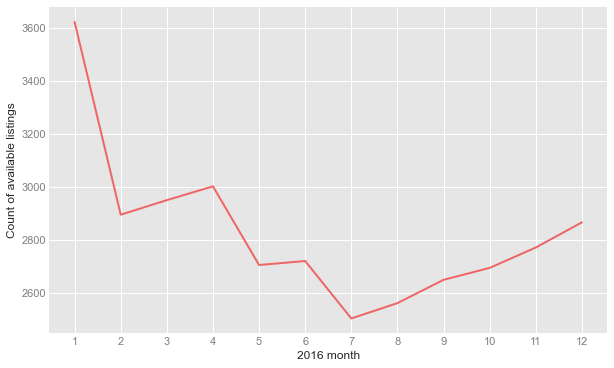

In [256]:
# Plot line chart shows the total available listings throughout 2016
listings_by_month = calendar[calendar.available == 't'].groupby('month')['listing_id'].nunique()
plt.figure(figsize = (10,6))
sns.lineplot(x=listings_by_month.index, y = listings_by_month.values)
plt.xticks(np.arange(1,13,step = 1))
plt.xlabel('2016 month')
plt.ylabel('Count of available listings')
plt.show()

### What's the most popular property type and room type and how that influence the price?
__From below correlation scatterplot result, we can see there's a clear relationship between room type and price, entire home/apt has the highest price and then private room and the cheapest is shared room. And among the listings, entire apartment has the most listings.__

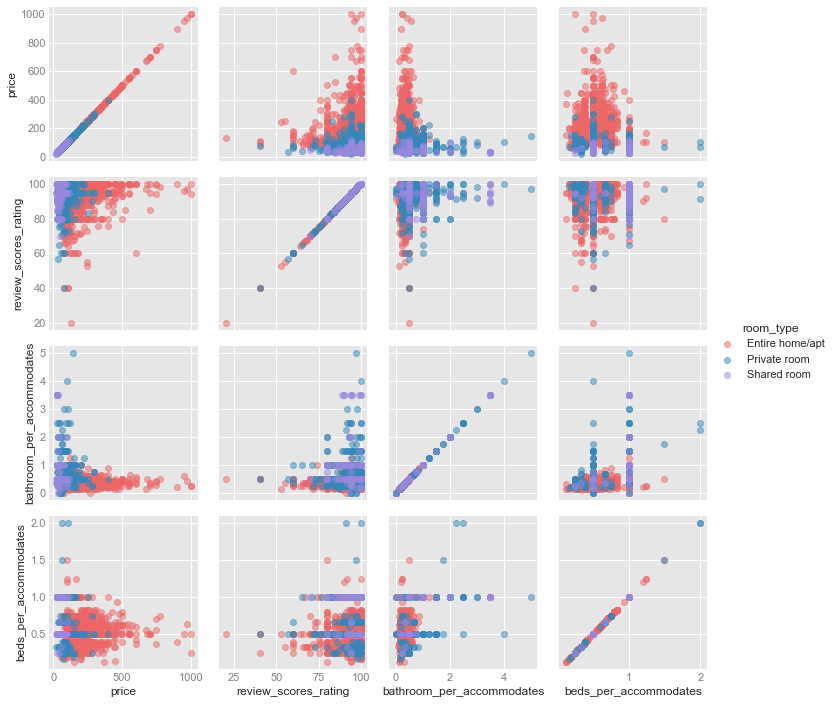

In [173]:
# Pair plot shows the relationship between 'price','review_scores_rating','bathroom_per_accommodates','beds_per_accommodates'

g = sns.PairGrid(listings_cleaned,vars=['price','review_scores_rating','bathroom_per_accommodates','beds_per_accommodates'],hue = 'room_type')
g.map(plt.scatter,alpha = 0.5)
g.add_legend()

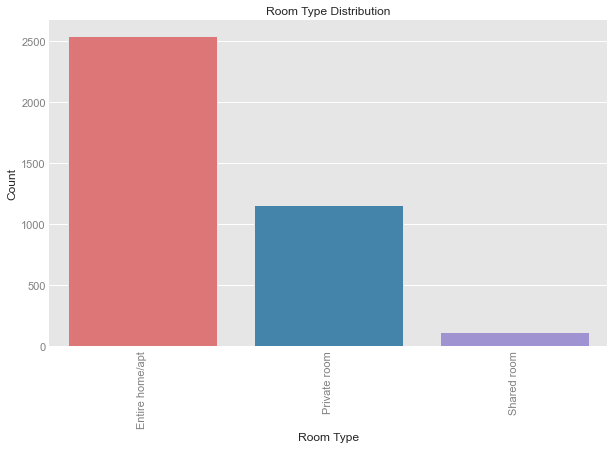

In [184]:
# count plot of room types 
plt.figure(figsize = (10,6))
sns.countplot(data = listings_cleaned, x = 'room_type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation = 90)
plt.show()

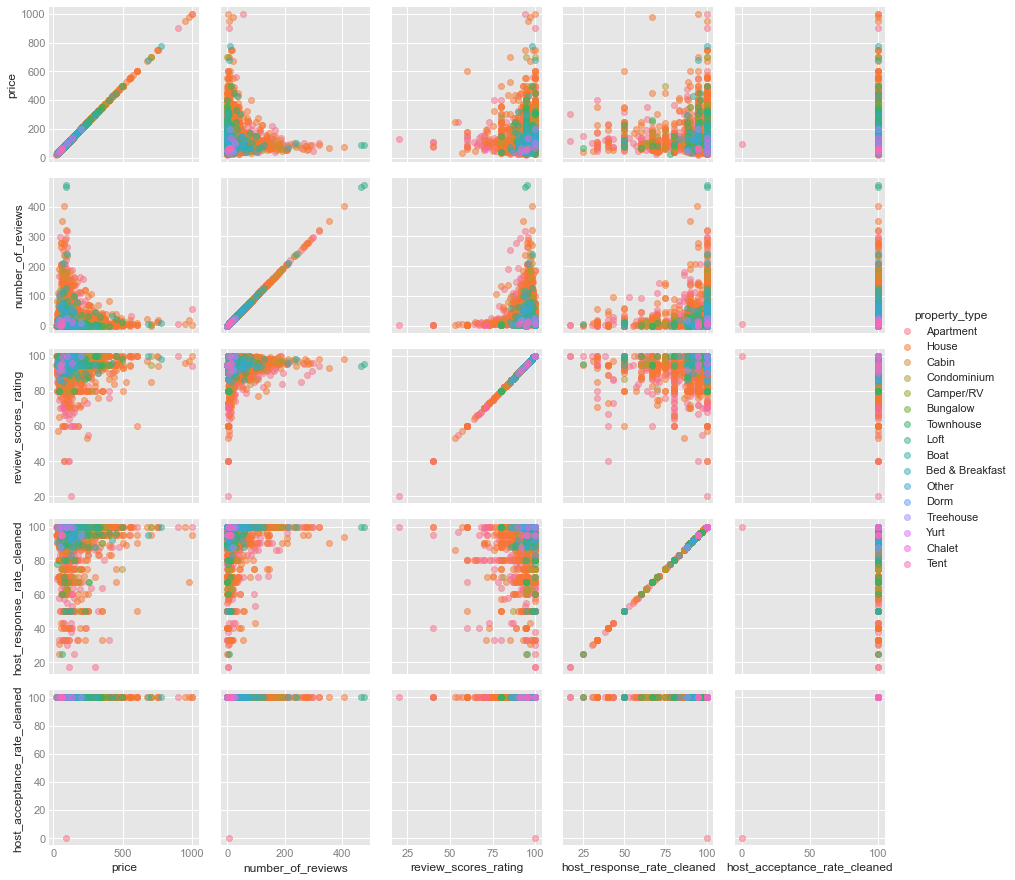

In [170]:
g = sns.PairGrid(listings_cleaned,vars=['price','number_of_reviews','review_scores_rating','host_response_rate_cleaned','host_acceptance_rate_cleaned'],hue = 'property_type')
g.map(plt.scatter,alpha = 0.5)
g.add_legend()

### Which area has most listings and which area airbnb averge price is the highest?
__From below sorted bar plot, we can see Broadway has the most listings around 350 and the second one is Belltown. The highest averge price area is Southeast Magnolia  while the second expensive one is Postage Bay. The cheapest area is Rainier Beach__

In [278]:
listings.head()

,id,last_scraped,host_id,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price_percentile,host_response_rate_cleaned,host_acceptance_rate_cleaned,bathroom_per_accommodates,beds_per_accommodates
0,241032,2016-01-04,956883,3.0,West Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,207,95.000000,f,moderate,f,f,0.4,96.000000,100.000000,0.250000,0.250000
1,953595,2016-01-04,5177328,6.0,West Queen Anne,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,43,96.000000,f,strict,t,t,0.8,98.000000,100.000000,0.250000,0.250000
2,3308979,2016-01-04,16708587,2.0,West Queen Anne,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,20,97.000000,f,strict,f,f,1.0,67.000000,100.000000,0.409091,0.636364
3,7421966,2016-01-04,9851441,1.0,West Queen Anne,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,0,94.539262,f,flexible,f,f,0.6,94.886798,99.967159,0.333333,0.666667
4,278830,2016-01-04,1452570,2.0,West Queen Anne,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,38,92.000000,f,strict,f,f,1.0,100.000000,99.967159,0.333333,0.500000


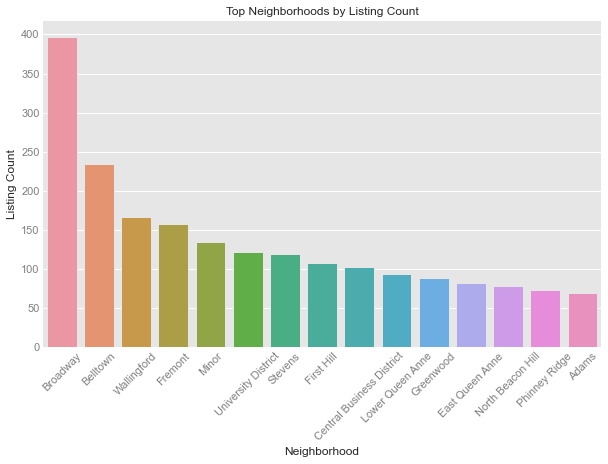

In [279]:
# barplot of listings in each neiboughood and sort by descending order
top_neighborhoods = listings_cleaned['neighbourhood_cleansed'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x=top_neighborhoods.index[:15], y = top_neighborhoods.values[:15])
plt.xlabel('Neighborhood')
plt.ylabel('Listing Count')
plt.title('Top Neighborhoods by Listing Count')
plt.xticks(rotation=45)
plt.show()

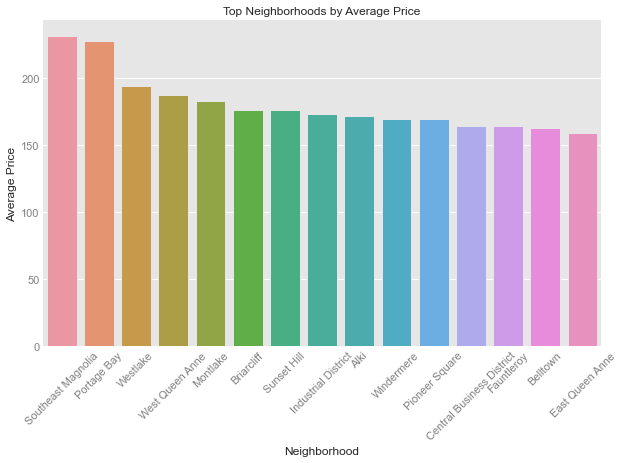

In [281]:
# Bar plot of the avergae price of each neighbourhood and sort by descending order
neiborhood_average_price = pd.DataFrame(listings_cleaned.groupby(['neighbourhood_cleansed'])['price'].mean()).sort_values(by = ['price'],ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x=neiborhood_average_price.index[:15], y = neiborhood_average_price['price'][:15])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top Neighborhoods by Average Price')
plt.xticks(rotation=45)
plt.show()

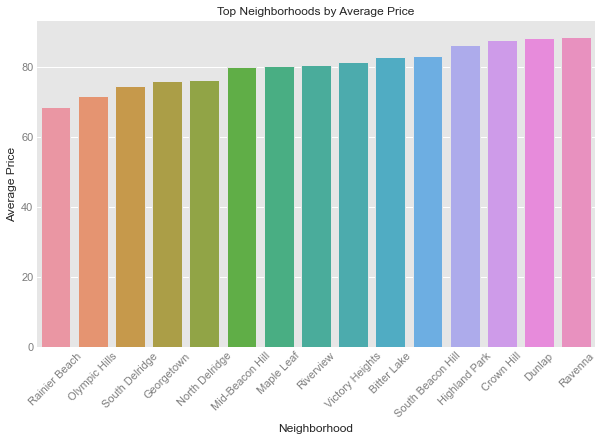

In [282]:
# Bar plot of the avergae price of each neighbourhood and sort by ascending order
neiborhood_average_price = pd.DataFrame(listings_cleaned.groupby(['neighbourhood_cleansed'])['price'].mean()).sort_values(by = ['price'],ascending = True)
plt.figure(figsize = (10,6))
sns.barplot(x=neiborhood_average_price.index[:15], y = neiborhood_average_price['price'][:15])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top Neighborhoods by Average Price')
plt.xticks(rotation=45)
plt.show()

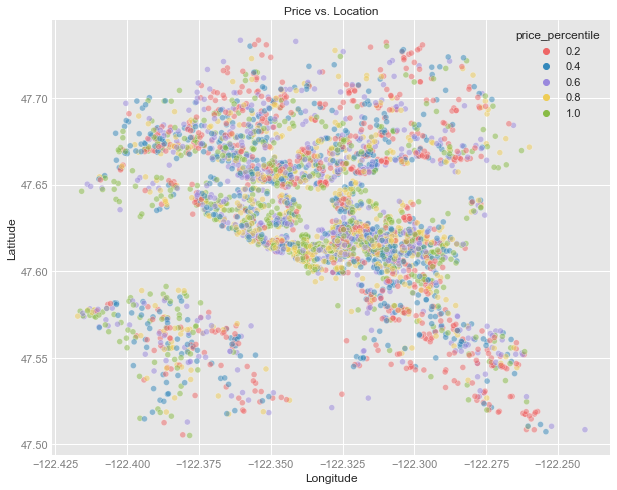

In [231]:
# Scatter plot based on the longitude and latitude to show the price distribution based on geography
plt.figure(figsize=(10, 8))
sns.scatterplot(data=listings_cleaned, x='longitude', y='latitude' ,hue='price_percentile',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price vs. Location')
plt.show()

In [181]:
listings_cleaned[['price','latitude', 'longitude']].corr()

,price,latitude,longitude
price,1.000000,-0.008904,-0.102420
latitude,-0.008904,1.000000,-0.155092
longitude,-0.102420,-0.155092,1.000000


In [182]:
listings_cleaned['host_id'].value_counts().head(10)

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
Name: host_id, dtype: int64

# Data Modeling
To build a model predicting the prices, we will test couple of models:
1. linear regression
2. random forest regressor
3. xgboost

- We will apply grid search and cross validation to select the best paramteres for Random Forest and Xgboost model. 
- Before we set up the model, we need to handle the categorialc features by creating dummy variables for them.

## Handling the categorical features

In [25]:
# Select categorical columns and create dummy variables, drop the original categorical columns
categorical_columns = listings_cleaned.select_dtypes(include = 'object').columns
categorical_dummy_vars = pd.get_dummies(listings_cleaned[categorical_columns])
df = listings_cleaned.drop(categorical_columns,axis=1)
df = pd.concat([df, categorical_dummy_vars],axis = 1)

# Drop 'id','host_id','price_percentile' which is not useful or has information leakage to predict price
df.drop(['id','host_id','price_percentile'],axis=1, inplace =True)
df.head()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,2,207,...,0,0,0,0,0,0,1,0,1,0
1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,1,43,...,0,0,0,0,0,0,1,0,0,1
2,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,10,20,...,0,0,0,0,0,0,1,0,0,1
3,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,100.0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,6,38,...,0,0,0,0,0,0,1,0,0,1


## Train and fit models

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Split data into train and test set
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

### Train LinearRegression Model 

In [28]:
# Linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Train and tune RandomForestRegressor Model

In [32]:
# Quote: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Set up random search parameters to find the best parameters for randomforest regressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
# train random regressor model 
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

### Train and Tune Xgboost Model
Quote: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

Generally, the XGBoost hyperparameters have been divided into 4 categories. They are as follows -

- General parameters
- Booster parameters
- Learning task parameters

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,47.397422,1.009289,48.441841,2.894858
1,40.169936,0.725817,42.191365,2.976610
2,35.037267,0.587145,38.769449,2.690142
3,31.658203,0.535598,36.546439,2.450585
4,29.237275,0.480771,35.207152,2.324755
5,27.353198,0.473137,34.274371,2.057373
6,26.045631,0.375733,33.745482,2.017977
7,24.948298,0.337886,33.442434,1.861693
8,24.205993,0.457786,33.206988,1.752056
9,23.590809,0.451069,33.144159,1.678100


In [44]:
cv_results['test-mae-mean'].min()

32.67515430043052

#### Tune max_depth and min_child_weight

In [45]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [46]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:17:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.395607373014194 for 9 rounds
CV with max_depth=9, min_child_weight=6
	MAE 33.23495833827432 for 8 rounds
CV with max_depth=9, min_child_weight=7


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:17:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.27719052719174 for 7 rounds
CV with max_depth=10, min_child_weight=5
	MAE 33.6141231265167 for 8 rounds
CV with max_depth=10, min_child_weight=6
	MAE 33.4851106648497 for 8 rounds
CV with max_depth=10, min_child_weight=7


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:17:17] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.077296408361136 for 6 rounds
CV with max_depth=11, min_child_weight=5
	MAE 33.63554664738666 for 9 rounds
CV with max_depth=11, min_child_weight=6
	MAE 33.1551427661768 for 9 rounds
CV with max_depth=11, min_child_weight=7


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:17:18] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.00883045782044 for 7 rounds
Best params: 11, 7, MAE: 33.00883045782044


#### Tune subsample and colsample

In [47]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [48]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.00883045782044 for 7 rounds
CV with subsample=1.0, colsample=0.9
	MAE 33.182491539797546 for 7 rounds
CV with subsample=1.0, colsample=0.8


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:28] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.28583670199048 for 7 rounds
CV with subsample=1.0, colsample=0.7
	MAE 33.46546597361235 for 7 rounds
CV with subsample=0.9, colsample=1.0
	MAE 33.07155077867135 for 6 rounds
CV with subsample=0.9, colsample=0.9


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:29] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.55459782163073 for 6 rounds
CV with subsample=0.9, colsample=0.8
	MAE 33.5390874002271 for 10 rounds
CV with subsample=0.9, colsample=0.7
	MAE 33.139476919519026 for 10 rounds
CV with subsample=0.8, colsample=1.0


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:30] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 32.97102013559878 for 8 rounds
CV with subsample=0.8, colsample=0.9
	MAE 33.46546550469127 for 6 rounds
CV with subsample=0.8, colsample=0.8
	MAE 33.44628697842736 for 8 rounds
CV with subsample=0.8, colsample=0.7


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:31] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.89094271834669 for 12 rounds
CV with subsample=0.7, colsample=1.0
	MAE 33.35256680727697 for 8 rounds
CV with subsample=0.7, colsample=0.9
	MAE 33.49460603350198 for 7 rounds
CV with subsample=0.7, colsample=0.8


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


	MAE 33.538909968094046 for 8 rounds
CV with subsample=0.7, colsample=0.7
	MAE 34.39007581711683 for 9 rounds
Best params: 0.8, 1.0, MAE: 32.97102013559878


#### Tune eta

In [53]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 12.9 µs
CV with eta=0.3


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:20:21] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


CPU times: user 2.24 s, sys: 503 ms, total: 2.75 s
Wall time: 315 ms
	MAE 34.39007581711683 for 9 rounds

CV with eta=0.2
CPU times: user 2.78 s, sys: 628 ms, total: 3.41 s
Wall time: 355 ms
	MAE 32.79157318915054 for 14 rounds

CV with eta=0.1
CPU times: user 4.36 s, sys: 1.11 s, total: 5.47 s
Wall time: 609 ms
	MAE 32.09530571190051 for 27 rounds

CV with eta=0.05


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


CPU times: user 9.64 s, sys: 2.64 s, total: 12.3 s
Wall time: 1.43 s
	MAE 31.865738263394398 for 78 rounds

CV with eta=0.01


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:20:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


CPU times: user 46.3 s, sys: 10.3 s, total: 56.6 s
Wall time: 6.25 s
	MAE 31.579530123614127 for 381 rounds

CV with eta=0.005


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:20:30] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


CPU times: user 1min 23s, sys: 18.8 s, total: 1min 42s
Wall time: 11.1 s
	MAE 31.456931211615835 for 736 rounds

Best params: 0.005, MAE: 31.456931211615835


#### Set up model use the best performance parameter and re-train the model

In [59]:
params = {'colsample_bytree': 1.0,
 'eta': 0.005,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [56]:
tuned_xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:61.15982
[1]	Test-mae:60.96340
[2]	Test-mae:60.76657
[3]	Test-mae:60.57065
[4]	Test-mae:60.37736
[5]	Test-mae:60.18311
[6]	Test-mae:59.99074
[7]	Test-mae:59.79574
[8]	Test-mae:59.60211
[9]	Test-mae:59.40904
[10]	Test-mae:59.21901
[11]	Test-mae:59.03023
[12]	Test-mae:58.84441
[13]	Test-mae:58.66022
[14]	Test-mae:58.47951
[15]	Test-mae:58.29751
[16]	Test-mae:58.11992
[17]	Test-mae:57.94293
[18]	Test-mae:57.76386
[19]	Test-mae:57.58861
[20]	Test-mae:57.41177
[21]	Test-mae:57.23917
[22]	Test-mae:57.06413
[23]	Test-mae:56.89431
[24]	Test-mae:56.72118
[25]	Test-mae:56.55223
[26]	Test-mae:56.37999
[27]	Test-mae:56.21495
[28]	Test-mae:56.04424
[29]	Test-mae:55.88417
[30]	Test-mae:55.71982


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:24:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[31]	Test-mae:55.56045
[32]	Test-mae:55.39852
[33]	Test-mae:55.24177
[34]	Test-mae:55.08293
[35]	Test-mae:54.93079
[36]	Test-mae:54.77665
[37]	Test-mae:54.62700
[38]	Test-mae:54.47392
[39]	Test-mae:54.32509
[40]	Test-mae:54.17526
[41]	Test-mae:54.02569
[42]	Test-mae:53.87666
[43]	Test-mae:53.73069
[44]	Test-mae:53.58304
[45]	Test-mae:53.43373
[46]	Test-mae:53.28584
[47]	Test-mae:53.13901
[48]	Test-mae:52.99826
[49]	Test-mae:52.85500
[50]	Test-mae:52.71251
[51]	Test-mae:52.56508
[52]	Test-mae:52.42399
[53]	Test-mae:52.28178
[54]	Test-mae:52.14059
[55]	Test-mae:52.00422
[56]	Test-mae:51.86757
[57]	Test-mae:51.73498
[58]	Test-mae:51.59977
[59]	Test-mae:51.46487
[60]	Test-mae:51.33170
[61]	Test-mae:51.19839
[62]	Test-mae:51.06697
[63]	Test-mae:50.93747
[64]	Test-mae:50.80629
[65]	Test-mae:50.68090
[66]	Test-mae:50.55067
[67]	Test-mae:50.42251
[68]	Test-mae:50.29376
[69]	Test-mae:50.16728
[70]	Test-mae:50.04287
[71]	Test-mae:49.91809
[72]	Test-mae:49.79182
[73]	Test-mae:49.66960
[74]	Test-m

[376]	Test-mae:34.53077
[377]	Test-mae:34.51907
[378]	Test-mae:34.50523
[379]	Test-mae:34.49556
[380]	Test-mae:34.48174
[381]	Test-mae:34.47289
[382]	Test-mae:34.46333
[383]	Test-mae:34.44925
[384]	Test-mae:34.43879
[385]	Test-mae:34.42523
[386]	Test-mae:34.41537
[387]	Test-mae:34.40191
[388]	Test-mae:34.39361
[389]	Test-mae:34.38173
[390]	Test-mae:34.37116
[391]	Test-mae:34.36305
[392]	Test-mae:34.35142
[393]	Test-mae:34.33839
[394]	Test-mae:34.32799
[395]	Test-mae:34.31645
[396]	Test-mae:34.30832
[397]	Test-mae:34.29756
[398]	Test-mae:34.28675
[399]	Test-mae:34.27878
[400]	Test-mae:34.26960
[401]	Test-mae:34.25887
[402]	Test-mae:34.25095
[403]	Test-mae:34.24058
[404]	Test-mae:34.22914
[405]	Test-mae:34.22244
[406]	Test-mae:34.21317
[407]	Test-mae:34.20502
[408]	Test-mae:34.19665
[409]	Test-mae:34.18591
[410]	Test-mae:34.17872
[411]	Test-mae:34.16946
[412]	Test-mae:34.16251
[413]	Test-mae:34.15434
[414]	Test-mae:34.14519
[415]	Test-mae:34.13677
[416]	Test-mae:34.12993
[417]	Test-mae:3

[718]	Test-mae:33.38989
[719]	Test-mae:33.38802
[720]	Test-mae:33.38883
[721]	Test-mae:33.38662
[722]	Test-mae:33.38838
[723]	Test-mae:33.38991
[724]	Test-mae:33.38767
[725]	Test-mae:33.38726
[726]	Test-mae:33.38534
[727]	Test-mae:33.38661
[728]	Test-mae:33.38837
[729]	Test-mae:33.38721
[730]	Test-mae:33.38632
[731]	Test-mae:33.38646
[732]	Test-mae:33.38549
[733]	Test-mae:33.38467
[734]	Test-mae:33.38581
[735]	Test-mae:33.38605
[736]	Test-mae:33.38430
[737]	Test-mae:33.38490
[738]	Test-mae:33.38414
[739]	Test-mae:33.38447
[740]	Test-mae:33.38426
[741]	Test-mae:33.38582
[742]	Test-mae:33.38562
[743]	Test-mae:33.38764
[744]	Test-mae:33.38796
[745]	Test-mae:33.38615
[746]	Test-mae:33.38646
[747]	Test-mae:33.38649


# Evaluate the results

In [30]:
# Quote:https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
def evaluate(model, test_features, test_labels):
    '''evulate models result, create accuracy metrics and average error metrics'''
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### RandomForestRegressor Model evaluation

In [35]:
#Check the base randome forest regressor model accuracy and average error 
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 35.1572 degrees.
Accuracy = 72.02%.


In [36]:
# Check the best model's performance, there's 1.3% accuracy improvement from hyperparatmeter tuning
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 32.5328 degrees.
Accuracy = 73.34%.


Text(0.5, 0, 'Random Forest Feature Importance')

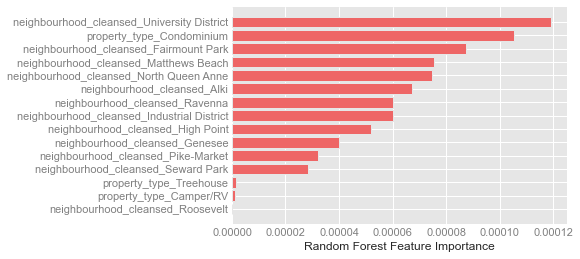

In [391]:
# Check feature imporatnce based on random forest result
# As we can see neighbourhood_cleansed has a strong relationship with price which makes sense as geography is the top factor influencing the airbnb price
sorted_idx = best_random.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx][:15], best_random.feature_importances_[sorted_idx][:15])
plt.xlabel("Random Forest Feature Importance")

### Xgboost Model evaluation

In [58]:
print("Best MAE: {:.2f} in {} rounds".format(tuned_xgb_model.best_score, tuned_xgb_model.best_iteration+1))

Best MAE: 33.38 in 739 rounds
